# Actividad N° 06: Apple Watch and Fitbit Activity

## Integrantes

**Grupo N° 03**

- Adriana Villalobos
- Gustavo Ledesma
- Alejo Cuello

## Descripción de la actividad 🔧🚜

Trabajamos sobre el conjunto de datos *aw_fb_data.csv* de Apple Watch y Fitbit Data. El objetivo de la actividad aplicar clustering para agrupar los datos y describir cada uno de estos clusters.

**Consideraciones**
- Nos basamos en el dataset de Kaggle: [Apple Watch and Fitbit data](https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data).
<br>`data = pd.read_csv("aw_fb_data.csv", sep=",", index_col=0)`
- Repliquen el notebook y apliquen lo aprendido a este dataset.

**Preparación de datos**
- Eliminar la columna `X1` y hacer un get dummies.

**KMeans**
- Probar con `n_clusters=3`.
- Gráfico 3D para las columnas `x='gender', y='age', z='calories'` y `color='activity'`

**HDBSCAN**
- Probar con `min_cluster_size=80`.
---

**Output**

Hagan un storytelling para 3 cluster que les llamo la atención, tanto para KMeans y HDBSCAN.

# 1) Cargamos los datos 📕

In [98]:
import pandas as pd
from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [99]:
data = pd.read_csv("aw_fb_data.csv", sep=",", index_col="Unnamed: 0")


In [100]:
data.head(3)

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,Lying
2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,Lying
3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,Lying


In [101]:
data.shape

(6264, 19)

# 2) Preparación de la data 👀

In [102]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,X1,0,0.0,0,0.000000,3656,int64
1,age,0,0.0,0,0.000000,24,int64
2,gender,0,0.0,3279,0.523467,2,int64
3,height,0,0.0,0,0.000000,28,float64
4,weight,0,0.0,0,0.000000,43,float64
5,steps,0,0.0,0,0.000000,3919,float64
6,hear_rate,0,0.0,0,0.000000,4514,float64
7,calories,0,0.0,0,0.000000,2136,float64
8,distance,0,0.0,0,0.000000,4863,float64
9,entropy_heart,0,0.0,18,0.002874,56,float64


Eliminar las columna `X1` de acuerdo a la consigna.

In [103]:
data = data.drop(["X1"], axis=1)

Reviso si hay nulos

In [104]:
data.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

Reviso si hay duplicados

In [105]:
data[data.duplicated()]

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
5082,37,1,183.0,115.0,1.0,155.0,75.0,1.0,0.106792,0.106792,155.0,1.0,0.0,0.0,24.033310,1.0,fitbit,Running 7 METs
5083,37,1,183.0,115.0,1.0,155.0,75.0,1.0,0.106792,0.106792,155.0,1.0,0.0,0.0,24.033310,1.0,fitbit,Running 7 METs
5086,18,1,180.3,90.0,1.0,3.0,3.5,1.0,0.104419,0.000000,3.0,1.0,0.0,0.0,24.033310,1.0,fitbit,Lying
5088,18,1,180.3,90.0,1.0,3.0,3.5,1.0,0.104419,0.000000,3.0,1.0,0.0,0.0,24.033310,1.0,fitbit,Lying
5306,48,1,170.0,88.0,1.0,139.0,20.5,1.0,0.097941,0.000000,139.0,1.0,0.0,0.0,21.345374,1.0,fitbit,Running 7 METs
5307,48,1,170.0,88.0,1.0,139.0,20.5,1.0,0.097941,0.000000,139.0,1.0,0.0,0.0,21.345374,1.0,fitbit,Running 7 METs
5311,20,1,184.0,77.3,1.0,4.0,4.0,1.0,0.519311,0.104419,4.0,1.0,0.0,0.0,21.345374,1.0,fitbit,Lying
6262,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.000000,0.000000,35.0,1.0,0.0,0.0,1.000000,1.0,fitbit,Running 7 METs
6263,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.000000,0.000000,35.0,1.0,0.0,0.0,1.000000,1.0,fitbit,Running 7 METs
6264,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.000000,0.000000,35.0,1.0,0.0,0.0,1.000000,1.0,fitbit,Running 7 METs


In [106]:
data = data.drop_duplicates()

### Cardinalizamos Activity para optimizar

In [107]:
activity_order = {
    "Lying": 0,
    "Sitting": 1,
    "Self Pace walk": 2,
    "Running 3 METs": 3,
    "Running 5 METs": 4,
    "Running 7 METs": 5
}

data['activity_order'] = data['activity'].map(activity_order)
data.drop(columns="activity",inplace=True)

In [108]:
data.head(3)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity_order
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,0
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,0
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,0


### Aplicamos Get Dummies

In [109]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0,False
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0,False
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0,False
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0,False
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0,False


# 3) AED & Storytelling 🧐

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'hear_rate'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_setps'}>,
        <Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>],
       [<Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>,
        <Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>],
       [<Axes: title={'center': 'activity_order'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

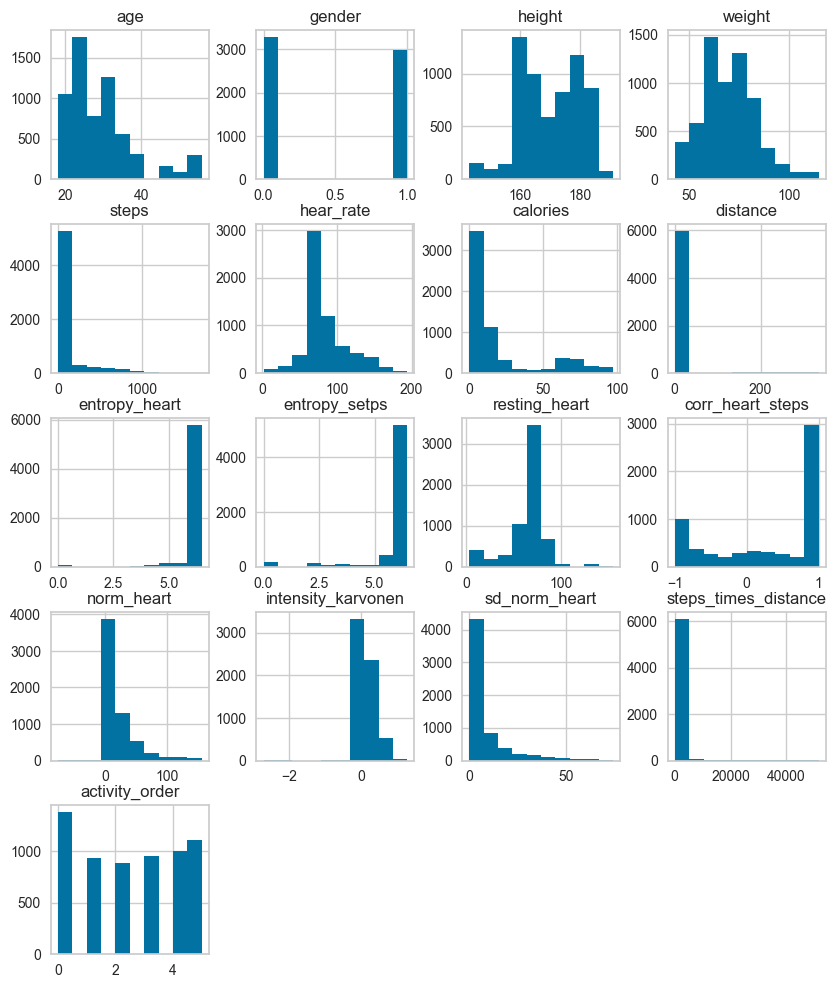

In [110]:
data.hist(figsize = (10,12))

In [111]:
len(data)

6254

### Análisis de distribución

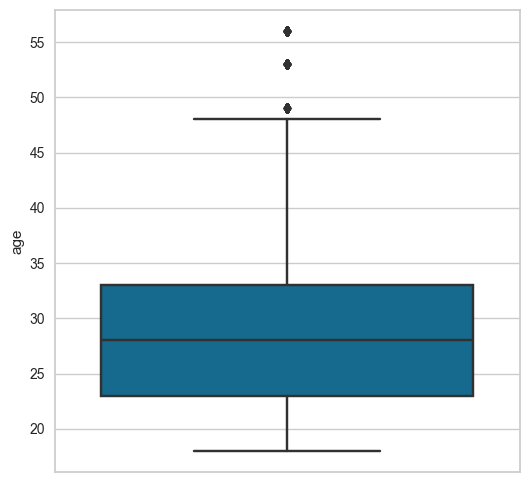

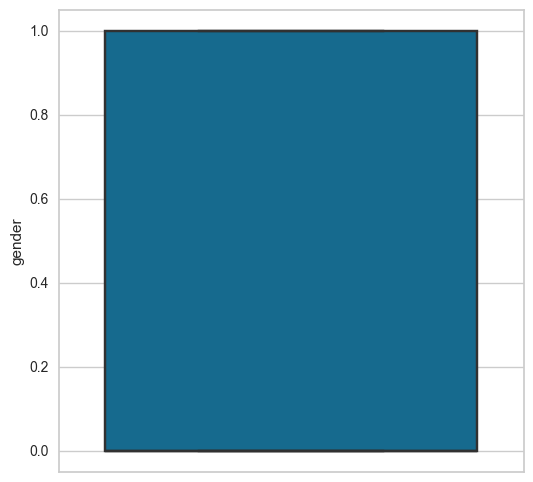

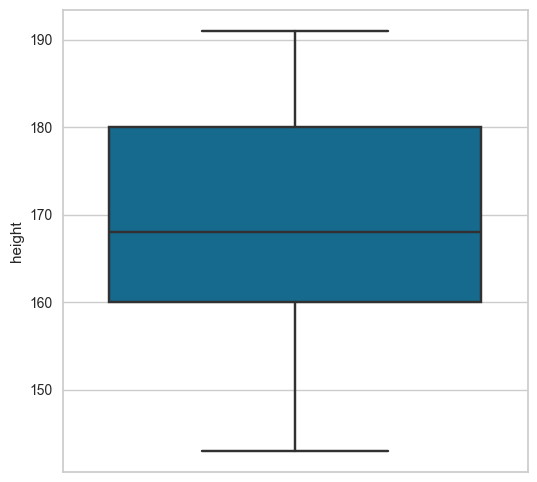

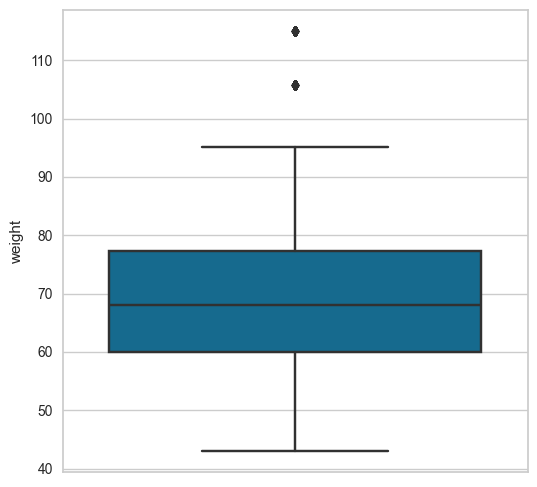

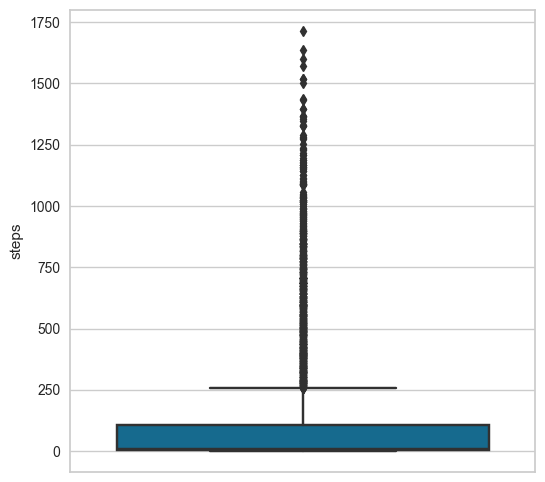

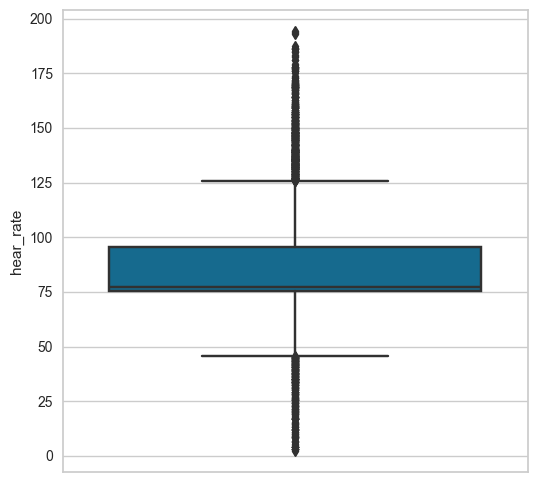

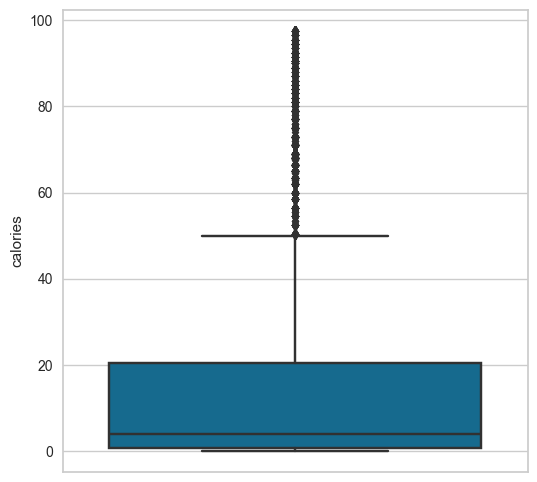

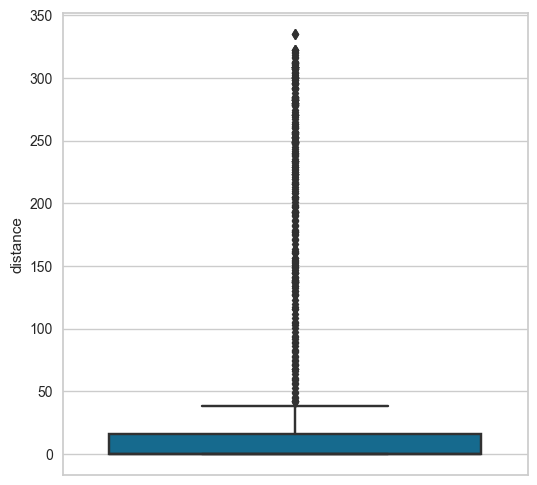

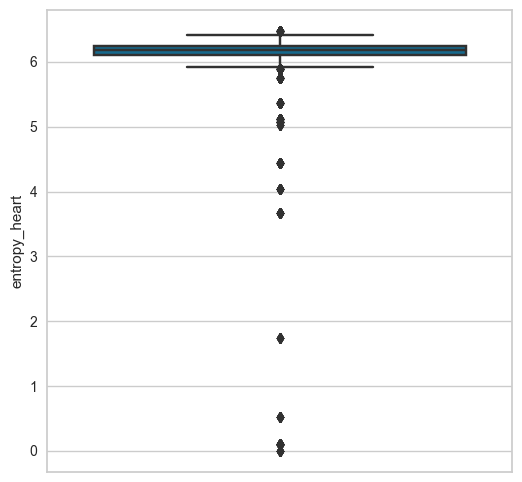

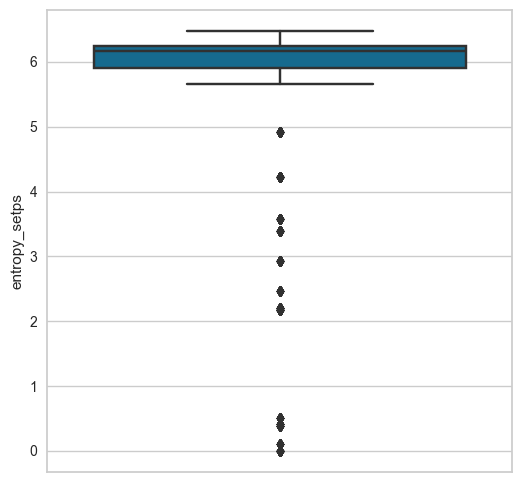

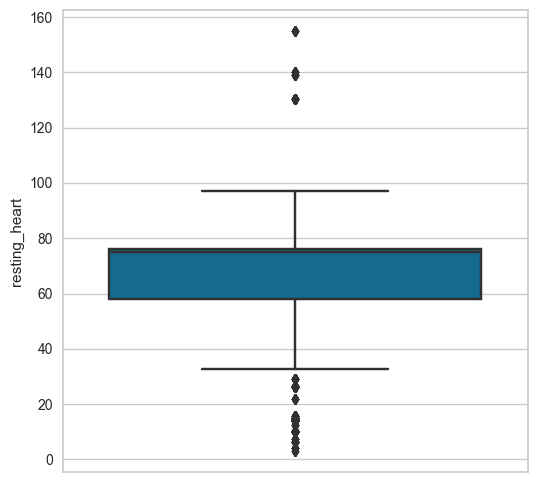

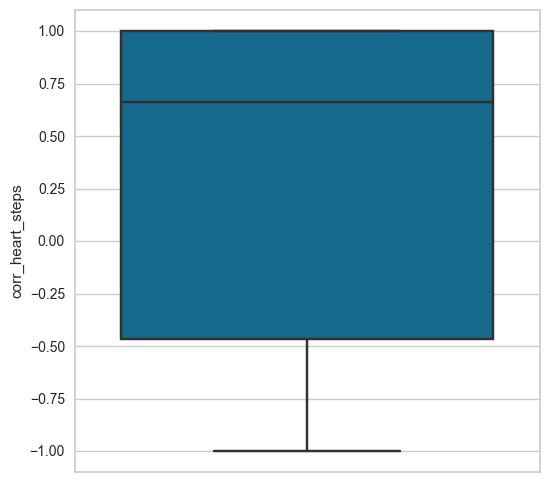

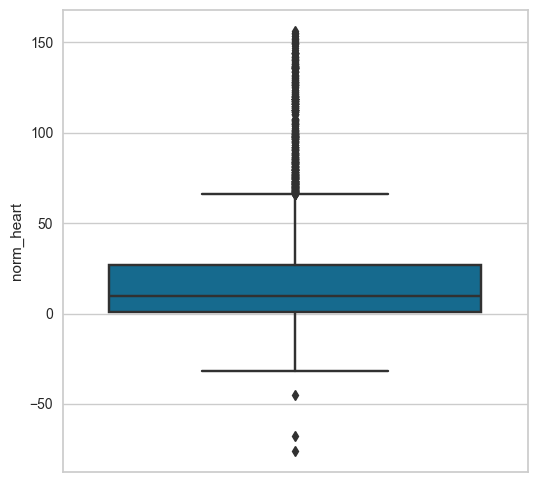

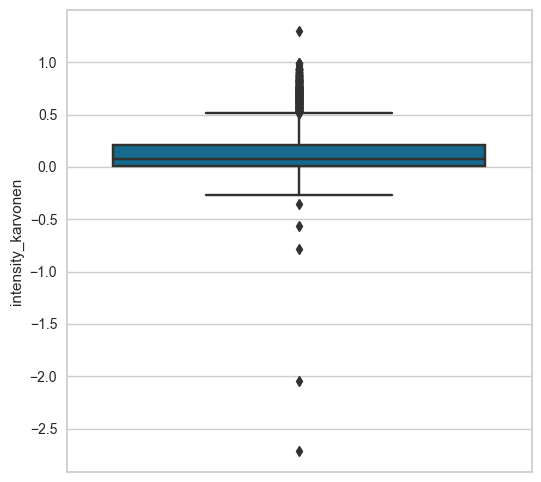

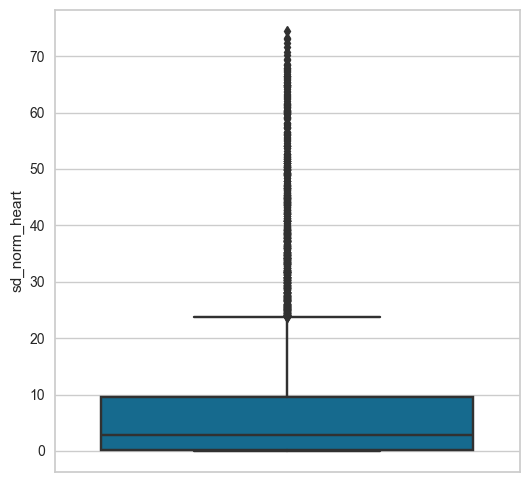

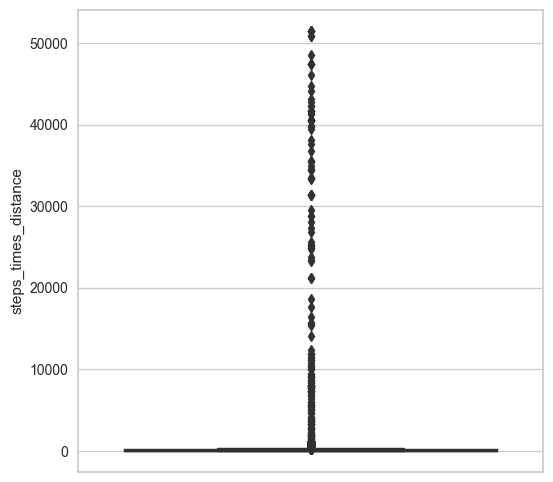

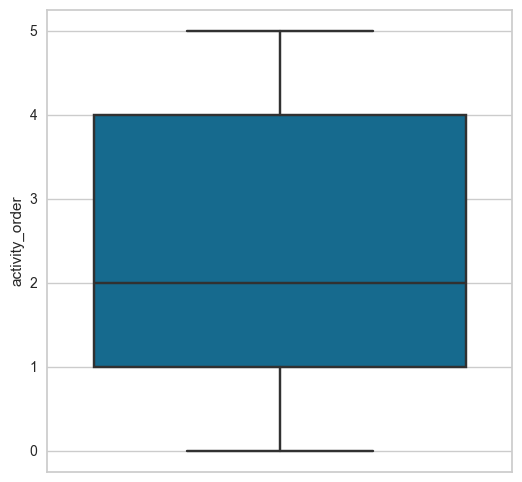

In [112]:
int_cols = data.select_dtypes(exclude='bool').columns
for _ in int_cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(data=data, y= _)
    plt.show()

Los gráficos de boxplot muestran columnas con muchos valores atípicos o outliers, lo cual sugiere una estandarización más que una normalización.

In [113]:
ProfileReport(data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 4504.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [114]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,24,int64
1,gender,0,0.0,3276,0.523825,2,int64
2,height,0,0.0,0,0.000000,28,float64
3,weight,0,0.0,0,0.000000,43,float64
4,steps,0,0.0,0,0.000000,3919,float64
5,hear_rate,0,0.0,0,0.000000,4514,float64
6,calories,0,0.0,0,0.000000,2136,float64
7,distance,0,0.0,0,0.000000,4863,float64
8,entropy_heart,0,0.0,15,0.002398,56,float64
9,entropy_setps,0,0.0,83,0.013272,60,float64


In [115]:
data_corr = data.corr()
print(data_corr.shape)


(18, 18)


In [116]:
data_corr

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit
age,1.000000,-0.236256,-0.519003,-0.154313,0.007043,-0.009661,-0.065802,-0.060933,0.008153,0.004485,-0.026943,0.067125,0.010272,0.072434,0.058310,-0.045721,-0.001108,-0.034819
gender,-0.236256,1.000000,0.735585,0.580259,-0.069441,-0.094743,0.071602,-0.051625,-0.048119,0.018151,-0.084672,-0.040668,-0.032442,-0.063945,-0.059534,0.022379,0.018362,0.006430
height,-0.519003,0.735585,1.000000,0.693942,0.025954,-0.124593,0.034005,-0.091399,-0.070064,0.051797,-0.029541,-0.031702,-0.103342,-0.124433,-0.092209,-0.075768,0.009895,-0.020077
weight,-0.154313,0.580259,0.693942,1.000000,0.046566,-0.066378,-0.025571,-0.071878,-0.147533,-0.043996,-0.018771,-0.066890,-0.052807,-0.063542,-0.012354,-0.008374,0.013411,-0.090642
steps,0.007043,-0.069441,0.025954,0.046566,1.000000,0.164381,-0.251010,-0.090673,0.016361,0.084278,0.084765,-0.228655,0.102380,0.143727,0.113115,0.023690,0.042437,-0.375229
hear_rate,-0.009661,-0.094743,-0.124593,-0.066378,0.164381,1.000000,-0.145045,-0.069425,0.056723,0.033319,0.376031,-0.174194,0.726391,0.783487,0.281326,0.064907,0.217869,-0.211227
calories,-0.065802,0.071602,0.034005,-0.025571,-0.251010,-0.145045,1.000000,0.255463,0.004457,-0.105723,-0.059748,0.207982,-0.101498,-0.164896,-0.148911,0.120058,0.191334,0.594105
distance,-0.060933,-0.051625,-0.091399,-0.071878,-0.090673,-0.069425,0.255463,1.000000,-0.062970,-0.303851,-0.323089,0.081811,0.169848,0.065806,0.297148,0.653982,0.028008,0.355297
entropy_heart,0.008153,-0.048119,-0.070064,-0.147533,0.016361,0.056723,0.004457,-0.062970,1.000000,0.677454,0.105774,-0.057280,-0.021431,0.038076,-0.271871,-0.076328,-0.018614,-0.136765
entropy_setps,0.004485,0.018151,0.051797,-0.043996,0.084278,0.033319,-0.105723,-0.303851,0.677454,1.000000,0.361965,-0.069067,-0.234981,-0.129900,-0.428191,-0.272042,-0.031839,-0.291983


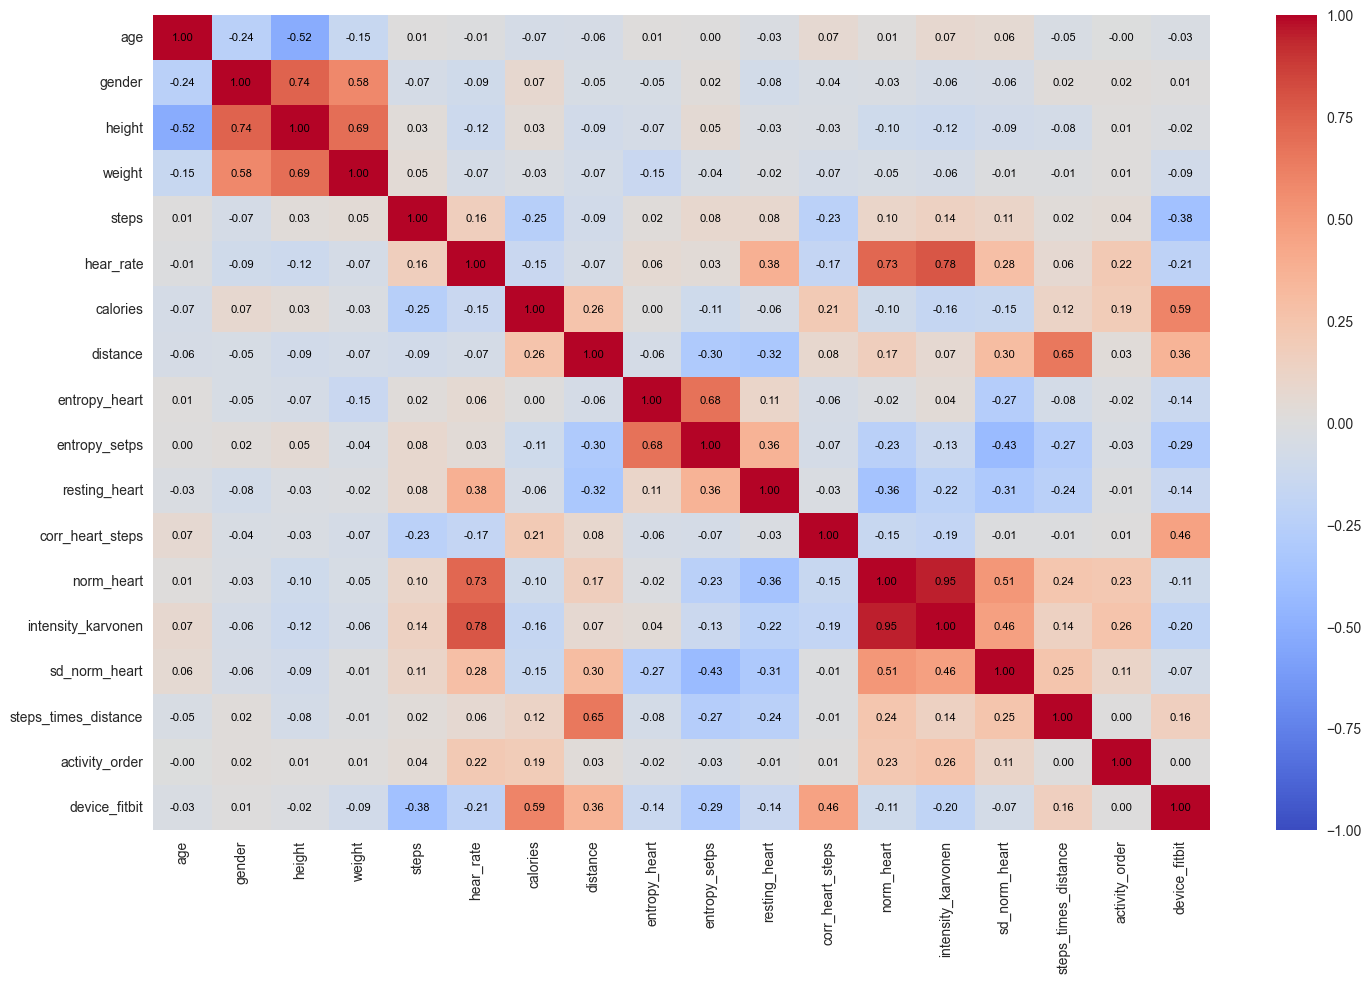

In [117]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(data_corr, cmap="coolwarm", cbar=True, vmin=-1, vmax=1) #Agregué las propiedades vmin y vmax para ver una escala de colores mejor

# Dibujar manualmente cada anotación pues sin esto solo muestra valores en la primer fila
for i in range(data_corr.shape[0]):
    for j in range(data_corr.shape[1]):
        text = f"{data_corr.iloc[i, j]:.2f}"
        ax.text(j + 0.5, i + 0.5, text,
                ha="center", va="center",
                fontsize=8, color="black")

plt.tight_layout()
plt.show()  

# 4) Clustering con K-Means 🎯

## 4.1) Tenemos que estandarizar los datos

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# A ver que hizo!?
pd.DataFrame(data_scaled).describe()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit
count,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03,6.254000e+03
mean,-1.363369e-16,-6.362391e-17,-2.435887e-15,1.999609e-16,5.453478e-17,1.090696e-16,7.271304e-17,3.635652e-17,4.726348e-16,2.908522e-16,-2.908522e-16,-1.454261e-16,-8.180217e-17,4.544565e-17,1.726935e-16,-1.817826e-17,1.022527e-16,-7.271304e-17
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,-1.252850e+00,-9.534335e-01,-2.587030e+00,-1.979904e+00,-4.877889e-01,-2.940559e+00,-7.105514e-01,-3.013302e-01,-8.289606e+00,-4.650169e+00,-2.984580e+00,-1.683267e+00,-3.391379e+00,-1.360283e+01,-6.460971e-01,-1.453211e-01,-1.340892e+00,-8.429785e-01
25%,-6.908797e-01,-9.534335e-01,-9.401591e-01,-7.138600e-01,-4.690972e-01,-3.702463e-01,-6.856933e-01,-3.009247e-01,9.435903e-02,1.296821e-01,-3.669320e-01,-9.969422e-01,-6.743371e-01,-6.910182e-01,-6.249756e-01,-1.451605e-01,-7.855686e-01,-8.429785e-01
50%,-1.289098e-01,-9.534335e-01,-1.651611e-01,-1.180746e-01,-4.469647e-01,-3.117369e-01,-5.661408e-01,-2.974467e-01,2.059436e-01,3.396108e-01,4.338101e-01,4.598421e-01,-3.650908e-01,-3.592173e-01,-4.152320e-01,-1.420029e-01,-2.302452e-01,-8.429785e-01
75%,4.330600e-01,1.048841e+00,9.973359e-01,5.745259e-01,-1.675904e-02,3.326438e-01,3.805225e-02,4.011812e-02,2.856901e-01,4.034673e-01,4.878729e-01,8.957851e-01,2.396839e-01,2.671018e-01,1.247117e-01,-1.222687e-01,8.804016e-01,1.186270e+00
max,3.018121e+00,1.048841e+00,2.062958e+00,3.382164e+00,7.196726e+00,3.788979e+00,2.857620e+00,6.985766e+00,5.983543e-01,5.877282e-01,4.232021e+00,8.957851e-01,4.789762e+00,5.413861e+00,5.294708e+00,1.252345e+01,1.435725e+00,1.186270e+00


In [119]:
data_scaled.sample(5)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit
4932,0.770242,-0.953433,-1.182346,-1.190488,-0.473912,-0.351042,2.180191,0.041412,0.178631,0.340375,0.465755,0.895785,-0.698362,-0.717379,-0.640077,-0.129461,0.880402,1.186270
3886,0.320666,1.048841,0.997336,0.231949,-0.457152,-0.326601,2.143574,0.040509,0.178631,0.340375,0.465755,0.895785,-0.673791,-0.688676,-0.640077,-0.115065,-1.340892,1.186270
1638,0.208272,1.048841,2.062958,2.689564,2.540260,3.242308,-0.688041,-0.299393,-0.929011,0.031329,0.006511,0.895785,3.254662,3.605699,2.082211,-0.130445,1.435725,-0.842978
3196,0.882636,-0.953433,-1.230783,-0.862806,-0.462555,2.776046,-0.710374,-0.301190,0.026131,0.129682,0.101467,0.895785,2.715498,3.276860,2.671512,-0.145310,1.435725,-0.842978
5637,-0.466092,-0.953433,-0.358911,-0.118075,-0.487789,-2.345059,-0.254890,-0.279587,0.135849,-2.655344,-2.414848,0.895785,-0.566349,-0.626918,0.291721,-0.145075,1.435725,1.186270


### PCA

In [120]:
from sklearn.decomposition import PCA

In [121]:
pca = PCA()
pca.fit(data_scaled)
pca_data_scaled = pca.transform(data_scaled)
pca_data_scaled

array([[-8.13371745e-01, -3.73446350e-01,  4.21192125e-01, ...,
        -7.15923280e-01,  8.93191263e-02, -6.06681694e-16],
       [-8.26321608e-01, -3.38532435e-01,  4.13617322e-01, ...,
        -7.12969863e-01,  9.15968130e-02, -5.20657324e-16],
       [-8.42394343e-01, -2.67853614e-01,  3.99611660e-01, ...,
        -7.06357660e-01,  9.58915575e-02, -5.69095540e-16],
       ...,
       [ 1.05816203e+00,  5.12621911e+00, -7.90085727e-01, ...,
        -1.93504434e-01,  3.34206213e-01,  1.21507136e-17],
       [ 6.45799163e-01,  5.12614609e+00, -8.39124389e-01, ...,
        -1.60927631e-01,  2.53650451e-01,  5.70431629e-16],
       [ 6.75454557e-01,  5.13545974e+00, -8.32962341e-01, ...,
        -1.62235263e-01,  2.54336855e-01,  5.63580460e-16]])

In [122]:
var = pca.explained_variance_ratio_
print(var)

[0.19176331 0.16028612 0.14038652 0.08856141 0.07456449 0.05974517
 0.0524697  0.04778443 0.04401545 0.03630457 0.02710379 0.02191628
 0.01793468 0.01472291 0.01266005 0.00759634 0.00218476 0.        ]


Text(0, 0.5, '% Variance')

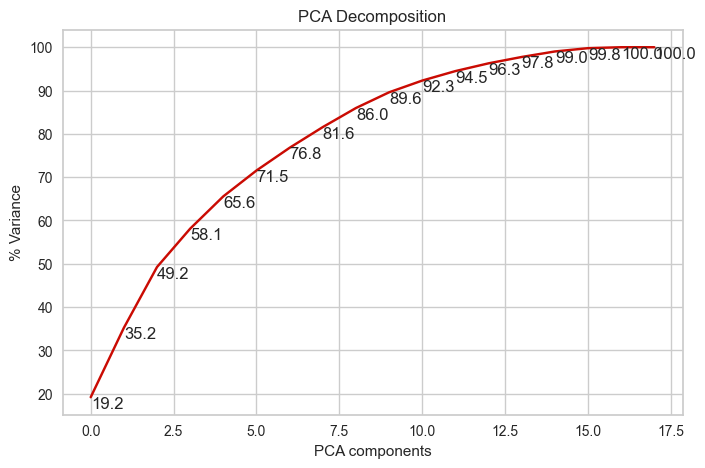

In [123]:
# Version con Anotaciones

cum_var = np.cumsum(np.round(var, decimals=4)*100)
components = list(range(0,18))
plt.figure(figsize=(8,5))
for s,d in zip(components,cum_var):
    plt.annotate(np.round(d,decimals=1), xy=(s,d-2.5))

plt.plot(components,cum_var, 'r-x')
plt.title("PCA Decomposition")
plt.xlabel('PCA components')
plt.ylabel('% Variance')

Con 10 componentes (Columnas) cubro el 90% de la varianza

In [124]:
pca_data_scaled = pd.DataFrame(pca_data_scaled)
pca_data_scaled.drop(pca_data_scaled.columns[11:],axis=1, inplace=True)

In [125]:
pca_data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.813372,-0.373446,0.421192,-0.308979,0.524885,-0.657700,-1.593439,-0.245073,0.601705,-0.177591,-0.663956
1,-0.826322,-0.338532,0.413617,-0.265277,0.517484,-0.646062,-1.563814,-0.255084,0.582175,-0.131311,-0.631221
2,-0.842394,-0.267854,0.399612,-0.166751,0.498793,-0.623472,-1.506801,-0.275937,0.538362,-0.032951,-0.564634
3,-0.840249,-0.261982,0.399043,-0.154916,0.496496,-0.620405,-1.500692,-0.277601,0.534578,-0.019790,-0.558303
4,-0.858313,-0.268529,0.396994,-0.134361,0.503442,-0.611974,-1.488320,-0.292971,0.501091,0.008404,-0.593654


## 4.2) KMeans

### PCA

In [126]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [127]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km_pca = KMeans(n_clusters = _)
    y = km_pca.fit_predict(pca_data_scaled)
    Sum_of_squared_distances.append(km_pca.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_scaled,y))

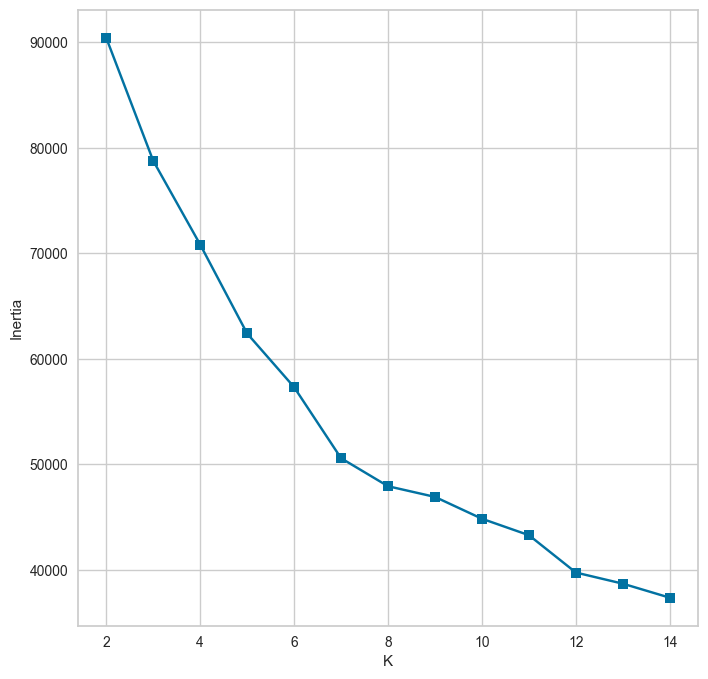

In [128]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bs-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

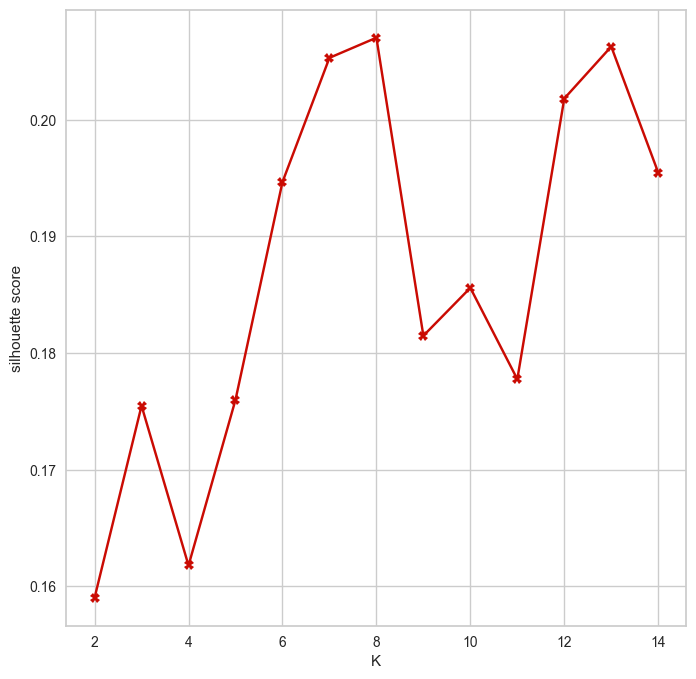

In [129]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rX-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [130]:
km_pca = KMeans(n_clusters = 4)
y = km_pca.fit_predict(pca_data_scaled)
print(silhouette_score(pca_data_scaled, y))
data['k_means_pca'] = y

0.1903539925629127


### Sin PCA

In [131]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(data_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled,y))

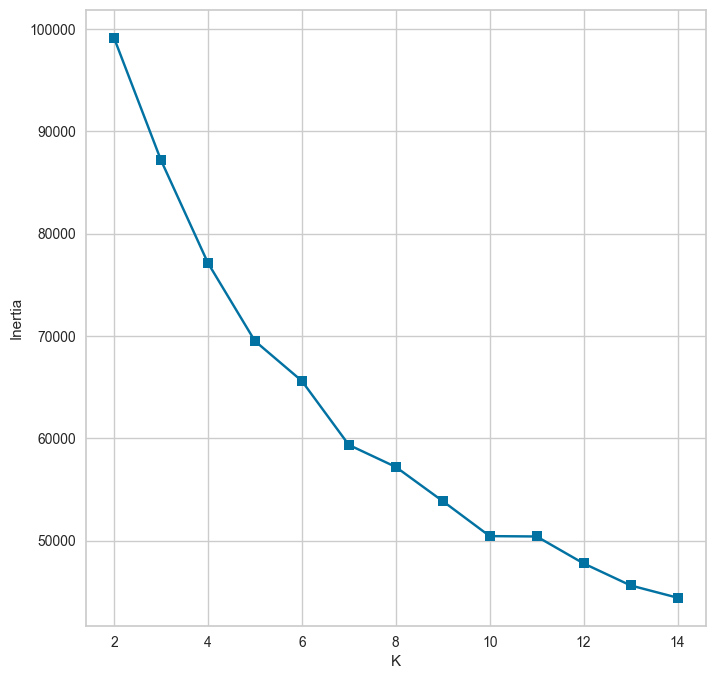

In [132]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bs-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

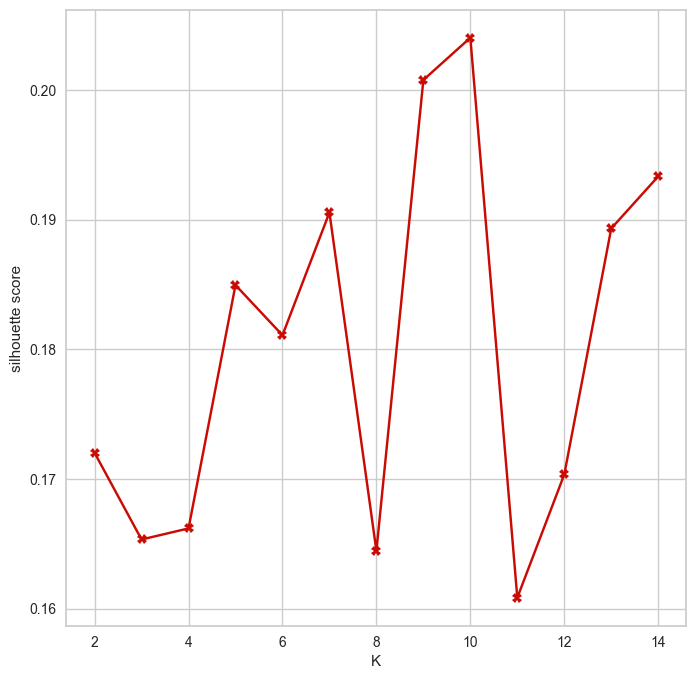

In [133]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rX-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



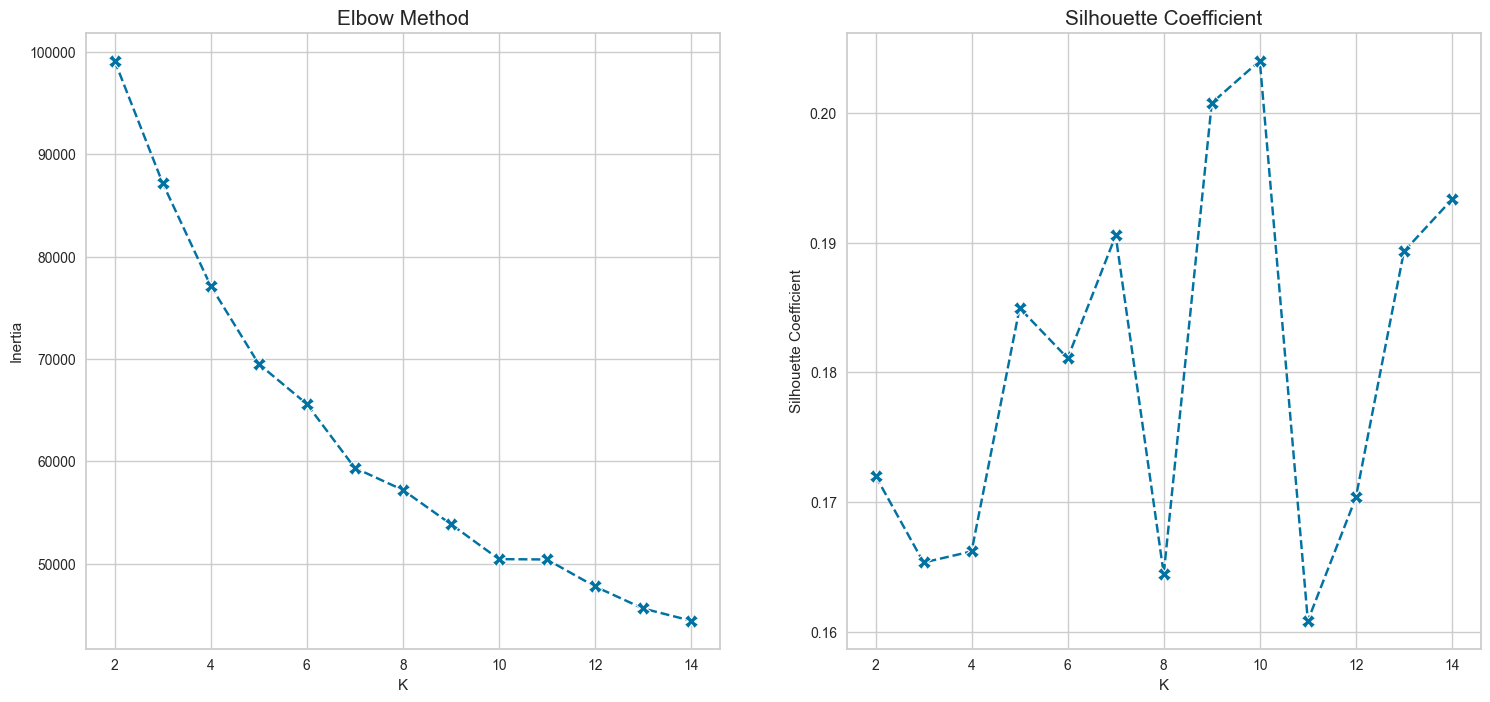

In [134]:
figdata = [
    (Sum_of_squared_distances, 'Elbow Method'),
    (silhouette_scores, 'Silhouette Coefficient')
]

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

for i, (values, title) in enumerate(figdata):
    sns.lineplot(ax=axes[i], x=K, y=values, linestyle='dashed', marker='X', markersize=10, color='b')
    axes[i].set_xlabel('K')
    axes[i].set_ylabel('Inertia' if i == 0 else 'Silhouette Coefficient')
    axes[i].set_title(title, size=15)

In [135]:
km = KMeans(n_clusters = 6)
y = km.fit_predict(data_scaled)
print(silhouette_score(data_scaled, y))
data['k_means'] = y

0.18108787782548968


### Conclusión KMeans

Sin PCA y con 6 clusters logramos el mismo silhouette (~0,18) score que con PCA y 4 clústers

## 4.3) Pequeño paréntesis... ¿Cantidad de clusters?

In [136]:
km

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [137]:
from copy import deepcopy

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



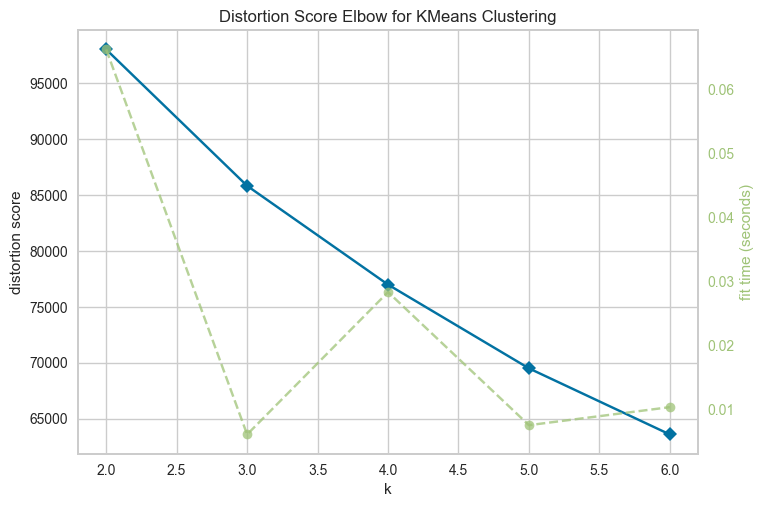

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



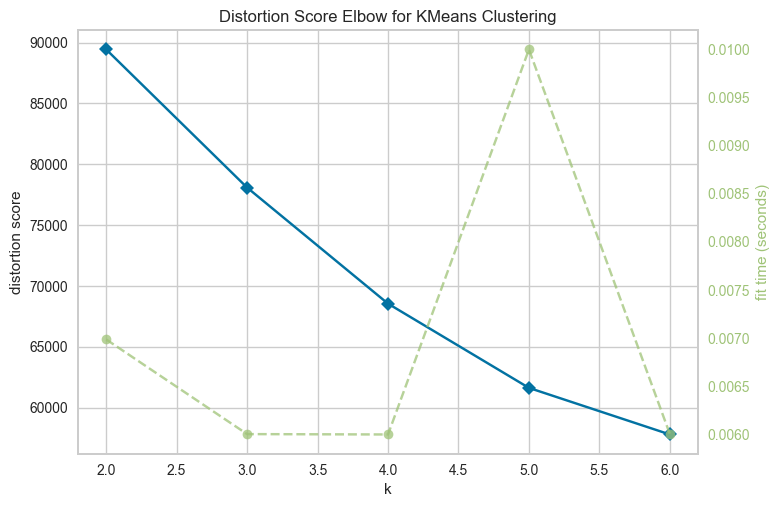

,estimator,KMeans(n_clusters=6)
,ax,<Axes: title=...ortion score'>
,k,"(2, ...)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,True
,locate_elbow,True
,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [138]:
from yellowbrick.cluster.elbow import kelbow_visualizer

km2_pca=deepcopy(km_pca)# ojo
km2=deepcopy(km) # ojo

kelbow_visualizer(km2, data_scaled, k=(2,7), locate_elbow=True)
kelbow_visualizer(km2_pca, pca_data_scaled, k=(2,7), locate_elbow=True)

## 4.4) Analizando el modelo final: Gráfico de coordenadas

Hacemos copia de los datos y le agregamos el cluster:

In [139]:
data_scaled.shape

(6254, 18)

In [140]:
km

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [141]:
from funpymodeling.model_validation import coord_plot

In [142]:
data_scaled.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit
0,-1.028062,1.048841,-0.165161,-0.311705,-0.443954,-0.267497,-0.699996,-0.301159,0.249572,0.29704,-0.325832,0.895785,-0.027239,-0.081561,-0.566310,-0.145299,-1.340892,-0.842978
1,-1.028062,1.048841,-0.165161,-0.311705,-0.440797,-0.270226,-0.592226,-0.301146,0.249572,0.29704,-0.325832,0.895785,-0.029983,-0.084180,-0.566310,-0.145296,-1.340892,-0.842978
2,-1.028062,1.048841,-0.165161,-0.311705,-0.437639,-0.267164,-0.365329,-0.301134,0.249572,0.29704,-0.325832,0.895785,-0.026904,-0.081241,-0.566310,-0.145293,-1.340892,-0.842978
3,-1.028062,1.048841,-0.165161,-0.311705,-0.434481,-0.264101,-0.340775,-0.301121,0.249572,0.29704,-0.325832,0.895785,-0.023825,-0.078302,-0.566310,-0.145289,-1.340892,-0.842978
4,-1.028062,1.048841,-0.165161,-0.311705,-0.431324,-0.261038,-0.316221,-0.301109,0.249572,0.29704,-0.325832,0.873626,-0.020746,-0.075363,-0.626823,-0.145286,-1.340892,-0.842978


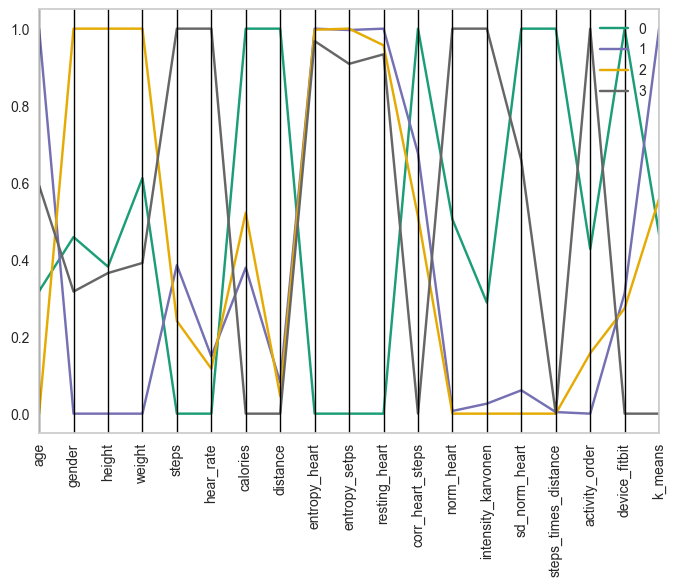

In [143]:
d_orig, d_transf = coord_plot(data, 'k_means_pca')

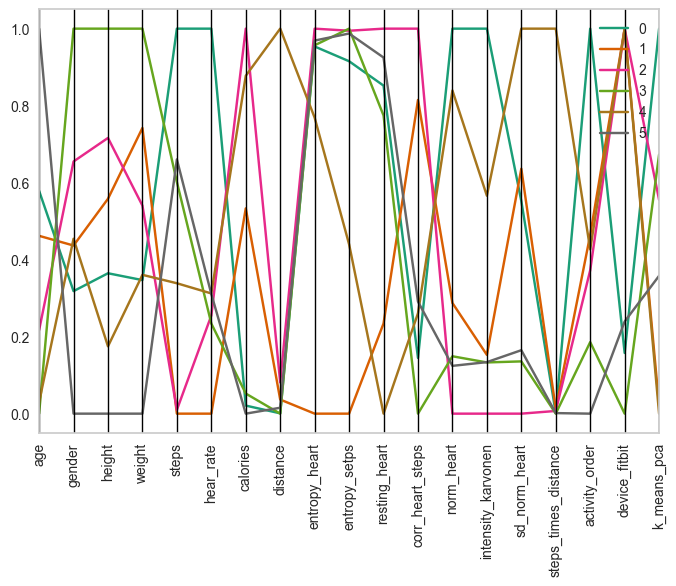

In [144]:
d_orig, d_transf = coord_plot(data, 'k_means')

### Silhouette

In [145]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

Para k=6 sin PCA:

In [146]:
sil_avg = silhouette_score(data_scaled, km.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.18108787782548968


c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,estimator,KMeans(n_clusters=6)
,ax,<Axes: >
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None


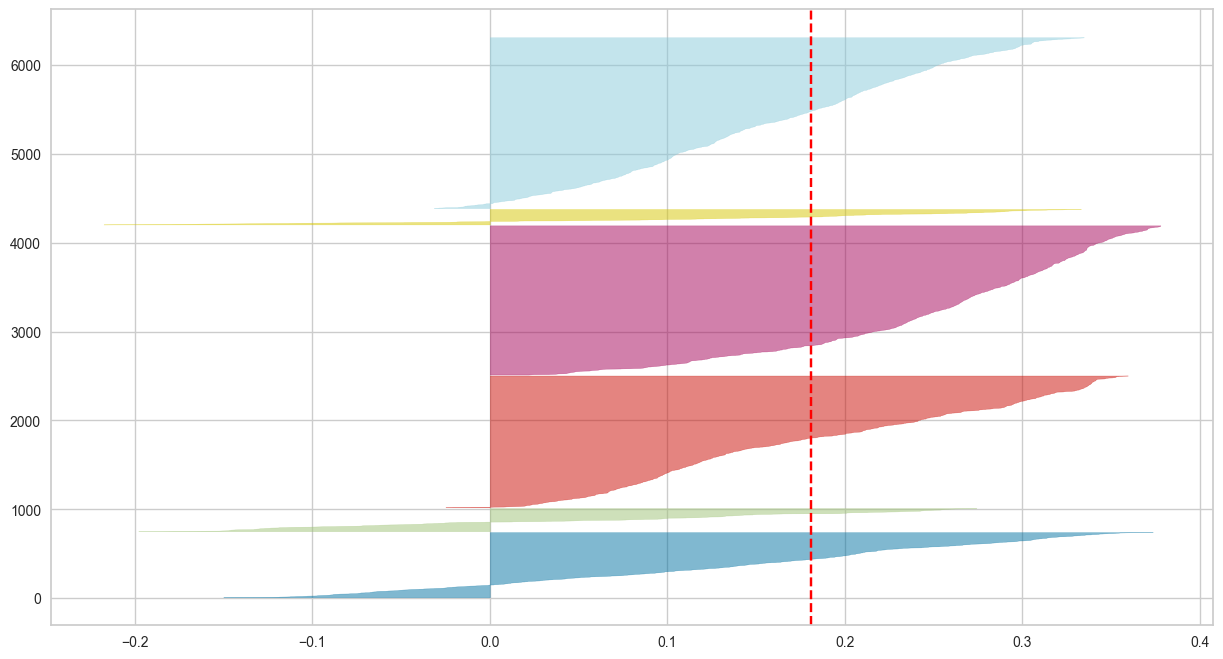

In [147]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_scaled)

Para k=4 con PCA:

In [148]:
sil_avg = silhouette_score(pca_data_scaled, km_pca.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.1903539925629127


,estimator,KMeans(n_clusters=4)
,ax,<Axes: >
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None


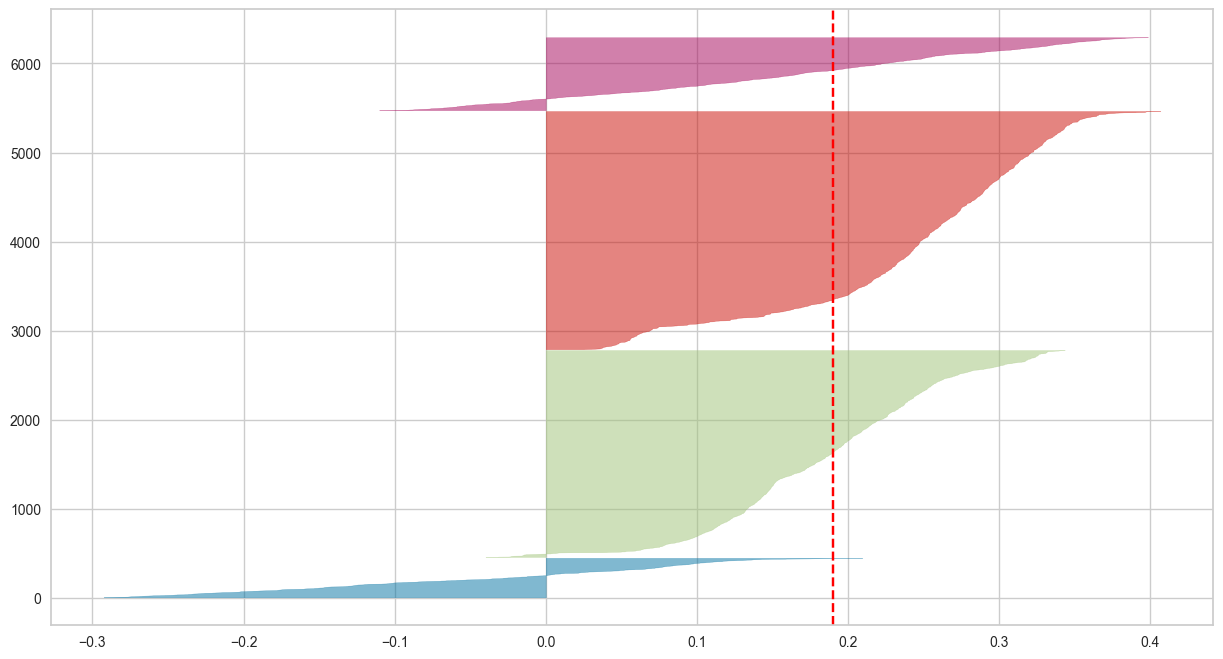

In [149]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(km_pca, colors='yellowbrick')
visualizer.fit(pca_data_scaled)

Podemos concluir que KMeans no es un buen método de clusterización ya que los valores del silhouette score es bajo. Tambien se observa que el score es algo mayor en los set de datos donde se aplicó PCA.

## Bonus: Scatter 3D!

In [150]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,24,int64
1,gender,0,0.0,3276,0.523825,2,int64
2,height,0,0.0,0,0.000000,28,float64
3,weight,0,0.0,0,0.000000,43,float64
4,steps,0,0.0,0,0.000000,3919,float64
5,hear_rate,0,0.0,0,0.000000,4514,float64
6,calories,0,0.0,0,0.000000,2136,float64
7,distance,0,0.0,0,0.000000,4863,float64
8,entropy_heart,0,0.0,15,0.002398,56,float64
9,entropy_setps,0,0.0,83,0.013272,60,float64


In [151]:
# Tomamos muestra para que no nos explote el gráfico ;)
d2=data.sample(n=300)

In [152]:
d2['activity_order'] = d2['activity_order'].astype('str')
d2['k_means'] = d2['k_means'].astype('str')
d2['k_means_pca'] = d2['k_means_pca'].astype('str')

In [153]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d2, x='gender', y='age', z='activity_order', color='k_means_pca')
fig.show()

# 5) Clustering con HDBSCAN 🤖

In [154]:
!pip install hdbscan

In [155]:
import hdbscan

## PCA

Generamos el modelo y fiteamos:
<br>**Condición todas las variables numéricas y sin nulos.**

In [156]:
hdb_pca = hdbscan.HDBSCAN()
hdb_pca.fit(pca_data_scaled)

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,min_cluster_size,5
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)
,approx_min_span_tree,True


In [157]:
# Nro de cluster
hdb_pca.labels_

array([234, 234, 234, ...,   5,   5,   5], dtype=int64)

In [158]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(hdb_pca.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,2269,0.362808,0.362808
1,56,66,0.010553,0.373361
2,135,34,0.005437,0.378798
3,17,34,0.005437,0.384234
4,233,32,0.005117,0.389351
...,...,...,...,...
353,193,5,0.000799,0.996802
354,316,5,0.000799,0.997602
355,105,5,0.000799,0.998401
356,104,5,0.000799,0.999201


**357 clusters**

Y uno de ellos es de ruido (indicado con el `-1`)

## Sin PCA

In [159]:
hdb = hdbscan.HDBSCAN()
hdb.fit(data_scaled)

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,min_cluster_size,5
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)
,approx_min_span_tree,True


In [160]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,2161,0.345539,0.345539
1,38,70,0.011193,0.356732
2,236,51,0.008155,0.364886
3,298,33,0.005277,0.370163
4,332,30,0.004797,0.37496
...,...,...,...,...
364,19,5,0.000799,0.996802
365,4,5,0.000799,0.997602
366,126,5,0.000799,0.998401
367,21,5,0.000799,0.999201


**369 clusters**

Y uno de ellos es de ruido (indicado con el `-1`)

## 5.2) Tuning/regularización de HDBSCAN para menos clusters

### PCA

In [161]:
# Ese 80 significa que cada cluster va a tener como mínimo 80 casos
model_hdb2_pca = hdbscan.HDBSCAN(min_cluster_size=80).fit(pca_data_scaled)

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [162]:
freq_tbl(model_hdb2_pca.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,4985,0.79709,0.79709
1,2,337,0.053886,0.850975
2,0,332,0.053086,0.904061
3,3,286,0.045731,0.949792
4,4,200,0.03198,0.981772
5,1,114,0.018228,1.0


In [163]:

data['hdb_pca']=model_hdb2_pca.labels_ # ojo aca! el predict es de los datos normalizados

**Notar el cluster de ruido. ¿qué cambió?**<br>
Primero el ruido era de 34% y aumentó a 47%, esto es una proporción muy alta para una clusterización?

### Sin PCA

In [164]:
# Ese 80 significa que cada cluster va a tener como mínimo 80 casos
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=80).fit(data_scaled)

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [165]:
freq_tbl(model_hdb2.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,2956,0.472657,0.472657
1,2,988,0.157979,0.630636
2,0,982,0.15702,0.787656
3,1,707,0.113048,0.900704
4,3,621,0.099296,1.0


In [166]:

data['hdb']=model_hdb2.labels_ # ojo aca! el predict es de los datos normalizados

**Notar el cluster de ruido. ¿qué cambió?**<br>
Primero el ruido era de 34% y aumentó a 47%, esto es una proporción muy alta para una clusterización?

## 5.3) Análisis del modelo cluster (profiling)

In [167]:
data.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit,k_means_pca,k_means,hdb_pca,hdb
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,19.531302,0.138520,1.000000,0.089692,0,False,2,3,-1,0
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,19.453390,0.137967,1.000000,0.102088,0,False,2,3,-1,0
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,19.540825,0.138587,1.000000,0.115287,0,False,2,3,-1,0
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,19.628260,0.139208,1.000000,0.129286,0,False,2,3,-1,0
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,19.715695,0.139828,0.241567,0.144088,0,False,2,3,-1,0


Saquemos el cluster de ruido:

In [168]:
data_noiseless=data.copy()
data_noiseless=data_noiseless.drop(data_noiseless[data_noiseless['hdb_pca'] == -1].index)
data_noiseless=data_noiseless.drop(data_noiseless[data_noiseless['hdb'] == -1].index)

In [169]:
data_noiseless

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit,k_means_pca,k_means,hdb_pca,hdb
82,30,0,164.0,68.0,11.642857,78.180791,6.535161,0.008859,6.026439,6.149747,...,8.580791,0.071269,0.206334,0.103145,1,False,1,5,1,2
83,30,0,164.0,68.0,11.817143,78.112642,7.347045,0.008965,6.026439,6.149747,...,8.512642,0.070703,0.206334,0.105946,1,False,1,5,1,2
84,30,0,164.0,68.0,11.991429,78.044492,8.158929,0.009072,6.026439,6.149747,...,8.444492,0.070137,0.206334,0.108785,1,False,1,5,1,2
85,30,0,164.0,68.0,12.165714,77.976342,8.970813,0.009178,6.026439,6.149747,...,8.376342,0.069571,0.206334,0.111661,1,False,1,5,1,2
86,30,0,164.0,68.0,12.340000,77.908192,9.782697,0.009285,6.026439,6.149747,...,8.308192,0.069005,0.206334,0.114574,1,False,1,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6100,31,0,164.0,60.0,2.903047,75.923998,3.500000,15.770083,6.266787,6.266787,...,0.256080,0.002260,0.070484,45.781294,1,True,1,5,2,3
6102,31,0,164.0,60.0,2.653740,75.877438,82.000000,15.772853,6.266787,6.266787,...,0.209520,0.001849,0.070484,41.857045,5,True,1,2,2,3
6104,31,0,164.0,60.0,2.404432,75.830878,6.500000,15.775623,6.266787,6.266787,...,0.162960,0.001438,0.070484,37.931416,5,True,1,2,2,3
6109,31,0,164.0,60.0,1.781163,75.714478,5.500000,15.782548,6.266787,6.266787,...,0.046560,0.000411,0.073731,28.111298,5,True,1,2,2,3


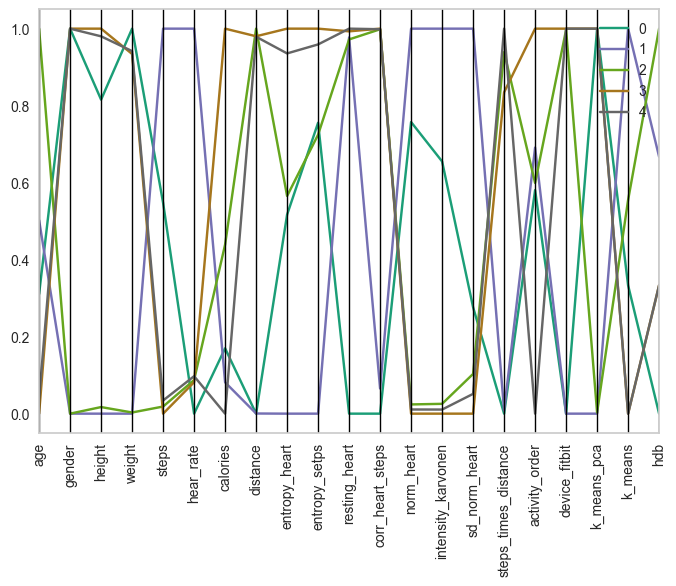

In [170]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(data_noiseless, 'hdb_pca')

In [171]:
d_orig

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit,k_means_pca,k_means,hdb,hdb_pca
0,26.753012,1.0,176.953614,77.232530,25.324098,75.184729,13.443548,0.018429,6.219823,6.237065,...,12.317479,0.092868,1.041254,0.939948,2.027108,0.000000,2.000000,3.000000,0.000000,0
1,27.956140,0.0,161.997368,61.778947,41.233527,91.461610,7.681394,0.024585,6.129979,6.030852,...,15.992989,0.138049,3.538363,1.867847,2.342105,0.000000,1.000000,5.000000,2.000000,1
2,31.077151,0.0,162.311276,61.825816,6.714367,76.606439,31.035756,16.052378,6.228243,6.228608,...,1.204836,0.010379,0.443704,107.205742,2.080119,0.997033,1.002967,3.664688,2.997033,2
3,24.804196,1.0,180.335664,76.215734,6.064632,76.514447,67.660839,15.734954,6.303784,6.303784,...,0.841878,0.007039,0.087624,95.383154,3.223776,1.000000,2.000000,2.000000,1.000000,3
4,25.050000,1.0,179.970000,76.331000,7.266970,76.768373,2.365000,15.715756,6.292603,6.292603,...,1.005925,0.008432,0.265027,114.097275,0.370000,1.000000,2.000000,2.000000,1.000000,4


In [172]:
d_transf

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit,k_means_pca,k_means,hdb,hdb_pca
0,0.310670,1.0,0.815574,1.000000,0.547628,0.000000,0.169667,0.000000,0.516921,0.755548,...,0.757410,0.655133,0.276355,0.000000,0.580672,0.000000,1.000000,0.333333,0.000000,0
1,0.502466,0.0,0.000000,0.000000,1.000000,1.000000,0.081420,0.000384,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.008200,0.691051,0.000000,0.000000,1.000000,0.667327,1
2,1.000000,0.0,0.017118,0.003033,0.018475,0.087345,0.439090,1.000000,0.565367,0.724564,...,0.023956,0.025498,0.103189,0.939098,0.599248,0.997033,0.002967,0.554896,1.000000,2
3,0.000000,1.0,1.000000,0.934203,0.000000,0.081694,1.000000,0.980203,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.834619,1.000000,1.000000,1.000000,0.000000,0.333663,3
4,0.039185,1.0,0.980060,0.941662,0.034188,0.097294,0.000000,0.979006,0.935671,0.959035,...,0.010827,0.010636,0.051410,1.000000,0.000000,1.000000,1.000000,0.000000,0.333663,4


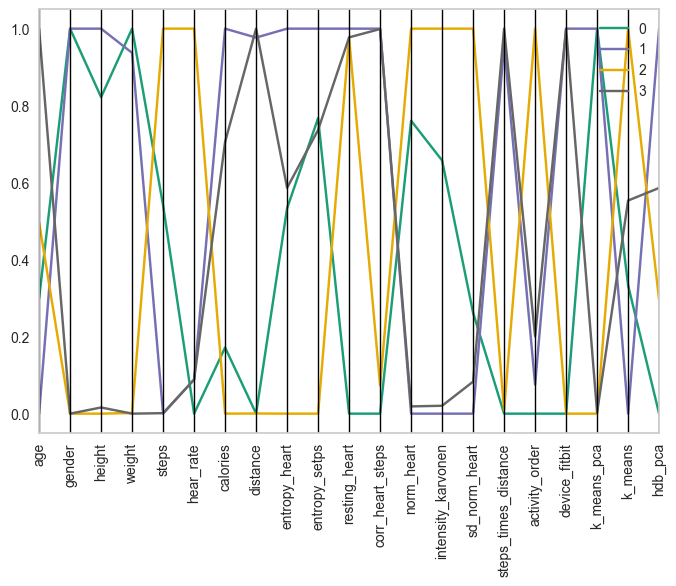

In [173]:
d_orig, d_transf = coord_plot(data_noiseless, 'hdb')


## 5.4) _Sanity check!_

Para qué sirve?

In [174]:
data_check=data.copy()
data_check['cluster']=model_hdb2.labels_
#data_check=data_check[['cluster', 'track_name']]

In [175]:
data_check.tail(3)


,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit,k_means_pca,k_means,hdb_pca,hdb,cluster
6259,46,0,157.5,71.4,1.0,35.0,1.0,1.0,0.0,0.0,...,0.0,25.072344,1.0,0,True,0,1,-1,-1,-1
6260,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,...,0.0,0.000000,1.0,5,True,0,1,-1,-1,-1
6261,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,...,0.0,1.000000,1.0,5,True,0,1,-1,-1,-1


## 5.5) Calculo de Silhouette

#### Repasando Silhouette:
    
Rango: [-1,+1]

+1: el punto esta muy cerca de su centroide

0: el punto esta en el medio de 2 clusters

-1: el punto asignado al cluster i esta más cerca del centroide del cluster j

### Calculandolo especialmente para HDBSCAN

In [176]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg_pca = silhouette_score(data, model_hdb2_pca.labels_)
sil_avg = silhouette_score(data, model_hdb2.labels_)

`silhouette_score`: nos da el promedio global

In [177]:
print(sil_avg_pca)
print(sil_avg)

-0.608337305338151
-0.34116114398888325


`silhouette_samples` nos da el valor silhouette para cada registro:

In [178]:
sample_silhouette_values_pca = silhouette_samples(data_scaled, model_hdb2_pca.labels_)
sample_silhouette_values = silhouette_samples(data_scaled, model_hdb2.labels_)

In [179]:
sample_silhouette_values

array([ 0.19316482,  0.19586821,  0.19474655, ..., -0.03063584,
       -0.04786116, -0.04722091])

In [180]:
res_sil=pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': model_hdb2.labels_})
res_sil

,sil_value,cluster
0,0.193165,0
1,0.195868,0
2,0.194747,0
3,0.193589,0
4,0.193494,0
...,...,...
6249,-0.007902,-1
6250,-0.015403,-1
6251,-0.030636,-1
6252,-0.047861,-1


In [181]:
res_sil_pca=pd.DataFrame({'sil_value': sample_silhouette_values_pca, 'cluster': model_hdb2_pca.labels_})
res_sil_pca

,sil_value,cluster
0,-0.391687,-1
1,-0.390521,-1
2,-0.385646,-1
3,-0.384668,-1
4,-0.384262,-1
...,...,...
6249,-0.017380,-1
6250,-0.023370,-1
6251,-0.035197,-1
6252,-0.045689,-1


Nuevo gráfico para observar la distribución

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



AttributeError: 'QuadContourSet' object has no attribute 'collections'

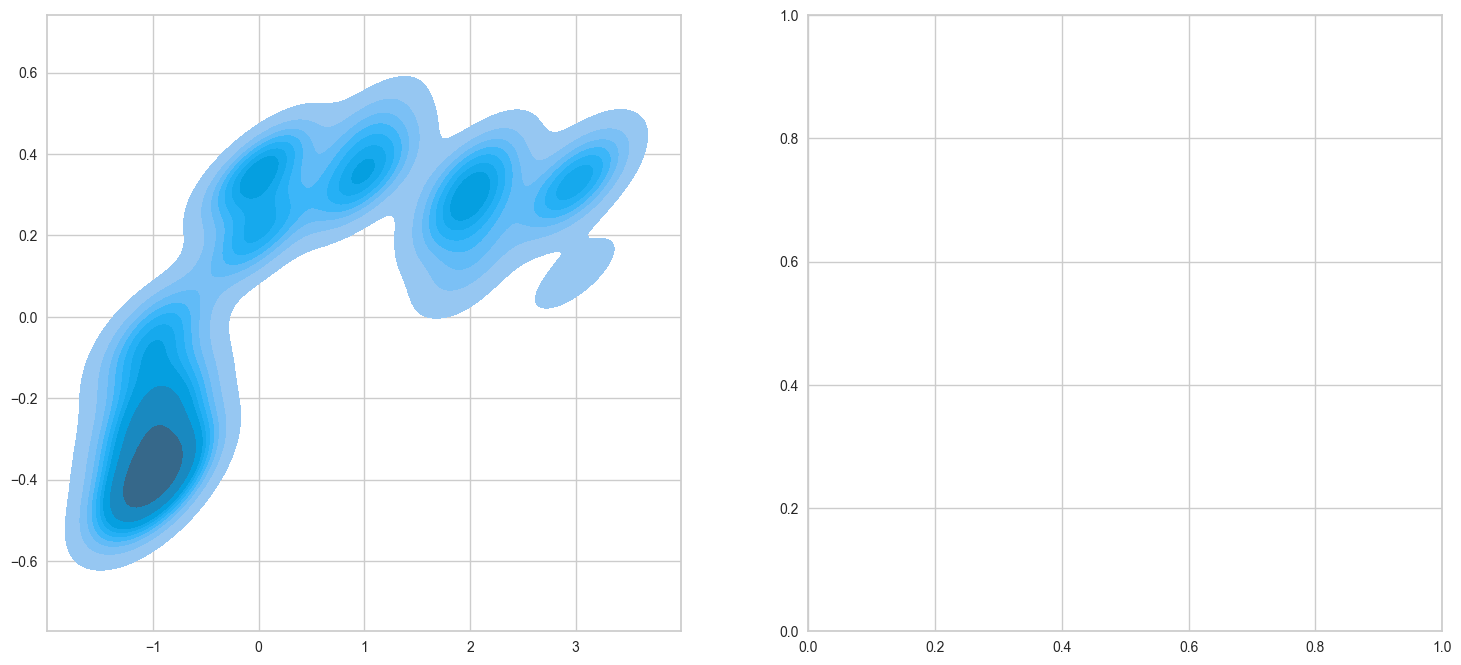

In [182]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
ax1 = sns.kdeplot(data=res_sil, x='cluster', y='sil_value', fill=True, ax=ax1)
ax2 = sns.kdeplot(data=res_sil_pca, x='cluster', y='sil_value', fill=True, ax=ax2)

Text(0.5, 1.0, 'HDBSCAN con PCA')

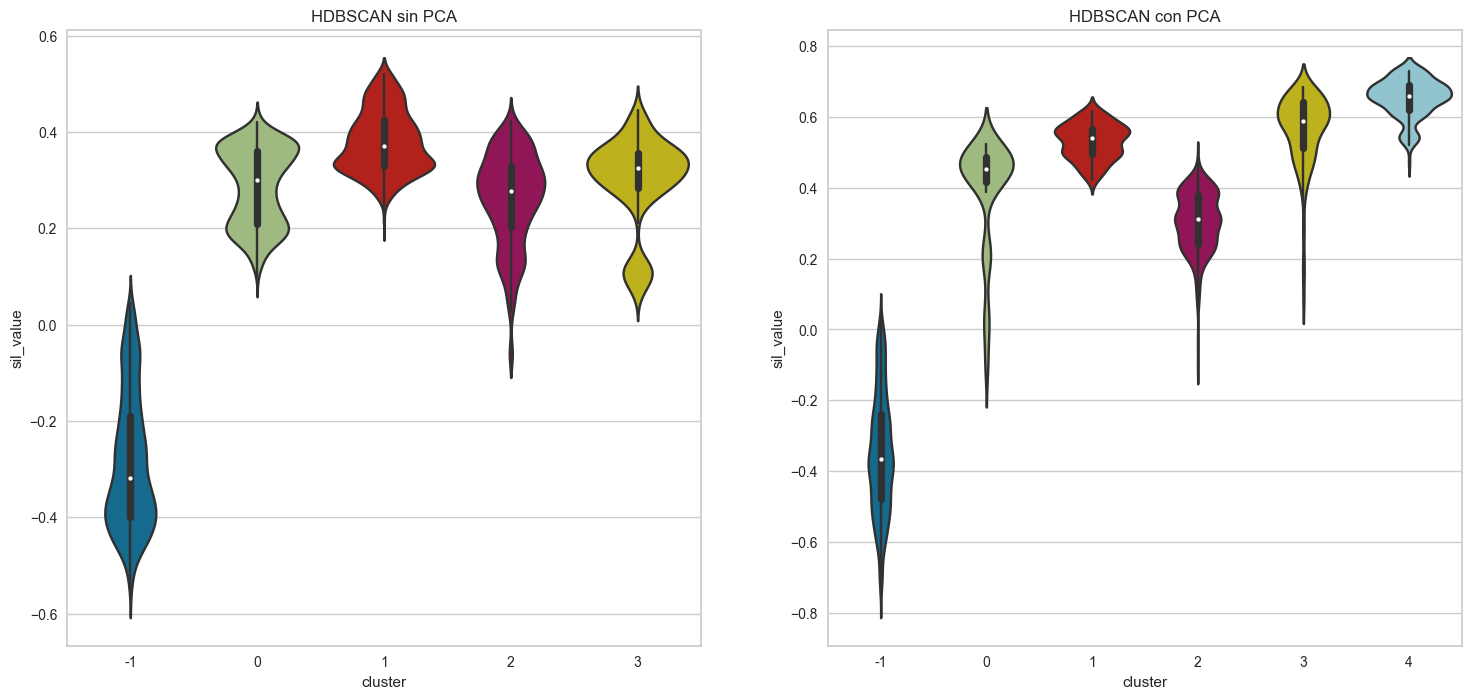

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
ax1 = sns.violinplot(data=res_sil, x='cluster', y='sil_value', fill=True, ax=ax1)
ax1.set_title("HDBSCAN sin PCA")
ax2= sns.violinplot(data=res_sil_pca, x='cluster', y='sil_value', fill=True, ax=ax2)
ax2.set_title("HDBSCAN con PCA")

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equ

Text(0.5, 1.0, 'HDBSCAN con PCA')

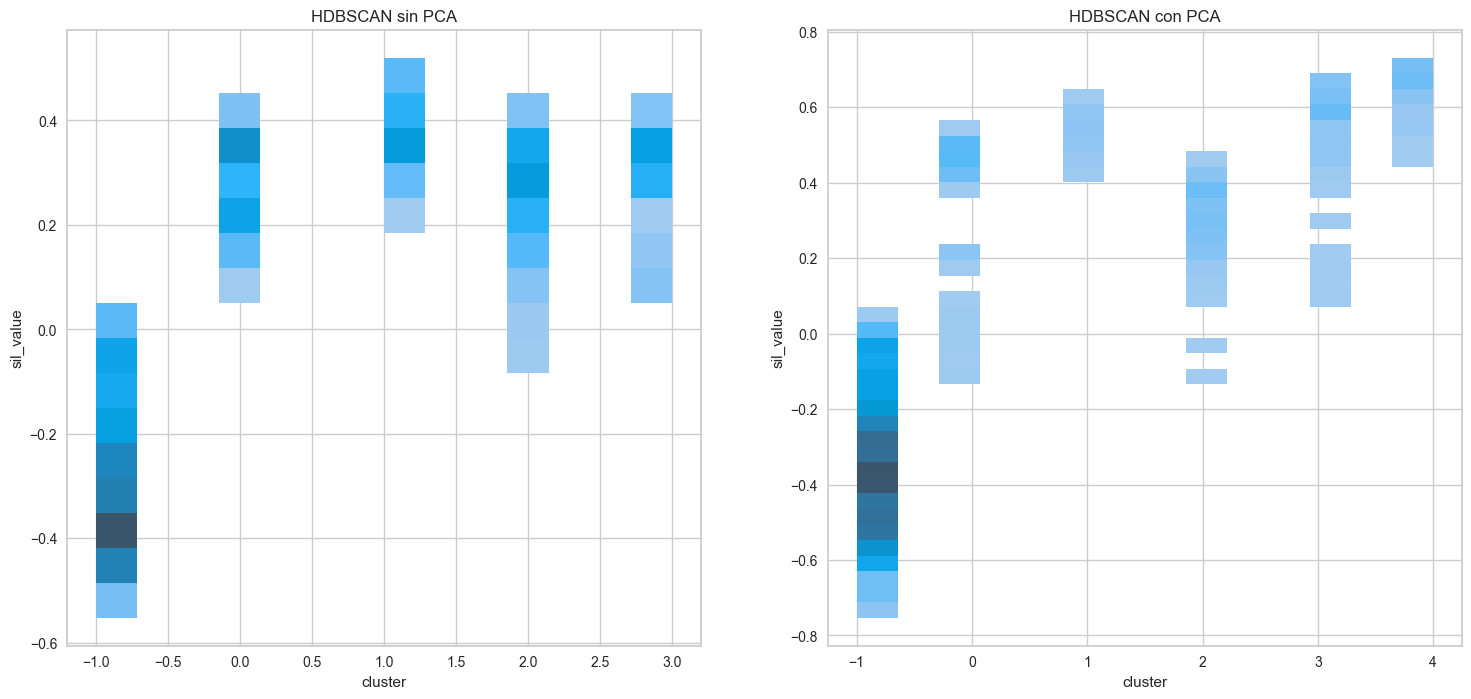

In [ ]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
ax1 = sns.histplot(data=res_sil, x='cluster', y='sil_value', fill=True, ax=ax1)
ax1.set_title("HDBSCAN sin PCA")
ax2= sns.histplot(data=res_sil_pca, x='cluster', y='sil_value', fill=True, ax=ax2)
ax2.set_title("HDBSCAN con PCA")

Promedio de Silhouette por cluster:

In [ ]:
res_sil.groupby('cluster').mean('sil_value')

,sil_value
cluster,
-1,-0.285988
0,0.286892
1,0.379446
2,0.260400
3,0.299723


In [ ]:
res_sil_pca.groupby('cluster').mean('sil_value_pca')

,sil_value
cluster,
-1,-0.350553
0,0.388595
1,0.531193
2,0.304287
3,0.564470
4,0.654960


## Analizando los registros agrupados por persona: ¿fueron al mismo cluster?

In [ ]:
grouped = data.groupby(["age", "gender", "height", "weight"])

value_counts_of_clustering_methods = {
    'k_means_pca': [],
    'k_means': [],
    'hdb_pca': [],
    'hdb': []
}

for group_key, group_df in grouped:
    # 'group_key' will be a tuple containing the unique values of the grouped columns (e.g., (30, 'M', 175, 75, 'Yes'))
    # 'group_df' is the DataFrame containing all the rows for that specific key combination
    
    # print(f"\n--- Processing Group: {group_key} ---")
    # print(f"Rows in this group: {len(group_df)}")
    # print("Value counts of k_means_pca: " + str(group_df['k_means_pca'].value_counts().shape[0]))
    # print("Value counts of k_means: " + str(group_df['k_means'].value_counts().shape[0]))
    # print("Value counts of hdb_pca: " + str(group_df['hdb_pca'].value_counts().shape[0]))
    # print("Value counts of hdb: " + str(group_df['hdb'].value_counts().shape[0]))
    
    value_counts_of_clustering_methods['k_means_pca'].append(group_df['k_means_pca'].value_counts().shape[0])
    value_counts_of_clustering_methods['k_means'].append(group_df['k_means'].value_counts().shape[0])
    value_counts_of_clustering_methods['hdb_pca'].append(group_df['hdb_pca'].value_counts().shape[0])
    value_counts_of_clustering_methods['hdb'].append(group_df['hdb'].value_counts().shape[0])
    
print("Promedio de clusters utilizados para los registros de cada persona")    
for key in value_counts_of_clustering_methods:
    print(key + ": " + str(round(pd.Series(value_counts_of_clustering_methods[key]).mean(),2)))
    
print("Si distinguimos también por dispositivo, estos valores aumentan")

Promedio de clusters utilizados para los registros de cada persona
k_means_pca: 2.27
k_means: 2.96
hdb_pca: 2.1
hdb: 2.29
Si distinguimos también por dispositivo, estos valores aumentan
